# Анализ A/B-тестирования для оценки наценки на билеты

В этом проекте мы анализируем данные компании, продающей билеты на транспортные услуги. Проведенный AB-тест разделил пользователей на две группы: 
- Группа A с наценкой 4%
- Группа B с наценкой 9%

Цель анализа — определить, какая ценовая стратегия приводит к большей прибыли, а также выявить факторы, влияющие на успех продаж.

In [57]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from scipy.stats import shapiro

In [2]:
# Загружаем данные
data = pd.read_csv('C:/Users/ASUS/Desktop/AB-test/data2022_HA3upd.csv', sep=";", decimal=".", encoding="latin1")
data = data.dropna().apply(pd.to_numeric, errors='coerce')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4300\924696421.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:/Users/ASUS/Desktop/AB-test/data2022_HA3upd.csv', sep=";", decimal=".", encoding="latin1")


In [3]:
data

,ID,T,bus_offers_count,passenger_count,direction_conv,price_mean,price_min,price_max,price_std,final_rating_mean,...,avia_pages,train,etrain,bus_pages,tours,avia_orders,bus_orders,zhd,buy,total_profit
0,1,1,2,1,0.011628,3077.604688,3077.604688,4014.000000,123.308992,0.000000,...,0,0,0,0,0,0,0,0,0,0.000000
1,2,0,17,1,0.089855,847.352941,750.000000,855.000000,24.809434,8.377989,...,0,0,0,0,0,0,0,0,0,0.000000
2,4,0,1,1,0.022222,2349.940000,2349.940000,2349.940000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0.000000
3,6,0,2,1,0.000000,460.312930,460.312930,613.750573,60.104076,4.666667,...,0,0,0,0,0,0,0,0,1,49.777153
4,7,1,23,1,0.063162,930.434783,800.000000,1500.000000,270.411778,8.753802,...,0,0,0,0,0,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74303,89997,1,3,1,0.024518,700.000000,700.000000,700.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0.000000
74304,89999,0,8,1,0.036260,469.375000,455.000000,480.000000,12.082307,8.899380,...,0,0,0,0,0,0,0,0,0,0.000000
74305,90000,1,1,1,0.009494,1055.164886,1055.164886,1406.886514,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0.000000
74306,90000,1,3,2,0.000000,1748.725651,1748.725651,2331.634201,549.028149,0.000000,...,0,0,0,0,0,0,0,0,0,0.000000


In [8]:
# Общая информация о данных
data.describe()

,ID,T,bus_offers_count,passenger_count,direction_conv,price_mean,price_min,price_max,price_std,final_rating_mean,...,avia_pages,train,etrain,bus_pages,tours,avia_orders,bus_orders,zhd,buy,total_profit
count,74308.000000,74308.000000,74308.000000,74308.000000,74308.000000,74308.000000,74308.000000,74308.000000,74298.000000,74292.000000,...,74308.000000,74308.000000,74308.000000,74308.000000,74308.000000,74308.000000,74308.000000,74308.000000,74308.000000,74308.000000
mean,44935.164841,0.504320,10.748304,1.149298,0.038918,940.060382,867.966715,1124.837159,121.449005,6.838407,...,2.383902,3.453652,1.014373,1.807813,0.147225,0.022541,0.066776,0.106705,0.062564,4.701759
std,25978.125733,0.499985,18.513145,0.518537,0.045149,743.242969,702.582312,898.492759,281.910904,3.293238,...,33.313261,27.303346,18.194982,19.471046,5.573150,0.396080,0.916212,0.971286,0.242179,26.857002
min,1.000000,0.000000,1.000000,1.000000,0.000000,9.210390,9.210390,12.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22428.500000,0.000000,2.000000,1.000000,0.010020,404.164965,358.419326,463.500000,0.000000,7.346537,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,44864.500000,1.000000,6.000000,1.000000,0.027586,746.798041,690.000000,857.000000,28.284271,8.288906,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,67431.250000,1.000000,13.000000,1.000000,0.054098,1230.705882,1145.590750,1500.000000,132.450092,8.734802,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,90001.000000,1.000000,551.000000,10.000000,1.000000,7000.000000,7000.000000,8333.099220,10870.350870,10.103553,...,2725.000000,1733.000000,1603.000000,2847.000000,813.000000,56.000000,101.000000,68.000000,1.000000,1363.861017


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74308 entries, 0 to 74307
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       74308 non-null  int64  
 1   T                        74308 non-null  int64  
 2   bus_offers_count         74308 non-null  int64  
 3   passenger_count          74308 non-null  int64  
 4   direction_conv           74308 non-null  float64
 5   price_mean               74308 non-null  float64
 6   price_min                74308 non-null  float64
 7   price_max                74308 non-null  float64
 8   price_std                74298 non-null  float64
 9   final_rating_mean        74292 non-null  float64
 10  final_rating_min         74308 non-null  float64
 11  final_rating_max         74308 non-null  float64
 12  final_rating_std         74308 non-null  float64
 13  dist                     74308 non-null  float64
 14  depth                 

### 1. Постановка задачи
Основная цель – оценить, какой из двух вариантов наценки (A или B) приводит к большей прибыли.

### 2. Выбор метрик
Целевая метрика – profit. Исследования показывают, что ценообразование влияет на прибыль.

### 3. Проверка экзогенности и балансировка ковариатов

In [20]:
# Проверка экзогенности и балансировка ковариатов
selected_columns = ['T', 'bus_offers_count', 'price_mean', 'price_min', 
                    'price_max', 'price_std', 'final_rating_mean', 
                    'final_rating_min', 'final_rating_max', 
                    'final_rating_std', 'dist']
selected_data = data[selected_columns]

In [23]:
# Группировка и вычисление средних значений
data_cov_mean = selected_data.groupby('T').mean().rename(index={0: 'mean_A', 1: 'mean_B'})
data_cov_mean

,bus_offers_count,price_mean,price_min,price_max,price_std,final_rating_mean,final_rating_min,final_rating_max,final_rating_std,dist
T,,,,,,,,,,
mean_A,10.751066,939.392691,867.701901,1124.191830,121.552496,6.833064,6.333896,7.217952,0.326521,378.754879
mean_B,10.745590,940.716634,868.226992,1125.471433,121.347298,6.843658,6.344540,7.230201,0.328229,379.439632


In [24]:
results = []
for col in selected_data.columns:
    t_stat, p_val = stats.ttest_ind(selected_data[selected_data['T'] == 0][col],
                                     selected_data[selected_data['T'] == 1][col])
    results.append({"variable": col, "t_statistic": t_stat, "p_value": p_val})

results_df = pd.DataFrame(results)
results_df

C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,variable,t_statistic,p_value
0,T,-inf,0.000000
1,bus_offers_count,0.040308,0.967848
2,price_mean,-0.242777,0.808179
3,price_min,-0.101860,0.918868
4,price_max,-0.194102,0.846097
5,price_std,NaN,NaN
6,final_rating_mean,NaN,NaN
7,final_rating_min,-0.458612,0.646514
8,final_rating_max,-0.479254,0.631759
9,final_rating_std,-0.529428,0.596510


Поскольку большинство p-значений значительно выше 0.05 (кроме T), можно сделать вывод о том, что ковариаты (за исключением переменной T) не имеют значительного влияния между группами. Это указывает на то, что переменные сбалансированы, и мы можем продолжать анализ, с большей вероятностью считая результаты нашего AB-теста достоверными. Далее найдем первичную оценку эффекта

### 4. Первичная оценка эффекта

In [28]:
# Первичная оценка эффекта
data_A = data[data['T'] == 0]['total_profit']
data_B = data[data['T'] == 1]['total_profit']
t_statistic, p_value = stats.ttest_ind(data_A, data_B)
print(f"T-statistic: {t_statistic}, P-value: {p_value}")

T-statistic: -2.427407003224164, P-value: 0.015209544833452516


Результаты t-теста показывают статистически значимую разницу в переменной total_profit между группами A и B на уровне значимости 5%. Т-статистика равна -2.427, что подчеркивает наличие существенного эффекта в размере -2.427

### 5. Множественная регрессия
В этом шаге мы используем множественную регрессию, чтобы оценить, как разные факторы (ковариаты) влияют на общую прибыль (total profit). Мы выбираем следующие переменные: количество предложений по автобусам, средняя цена, минимальная и максимальная цена, стандартное отклонение цен, средний и крайний рейтинг, расстояние и другие важные характеристики.

In [30]:
# Множественная регрессия
X = data[['bus_offers_count', 'price_mean', 'price_min', 'price_max', 
           'price_std', 'final_rating_mean', 'final_rating_min', 
           'final_rating_max', 'final_rating_std', 'dist']]
y = data['total_profit']

In [34]:
# Заменяем пропуски на среднее значение
X['price_std'].fillna(X['price_std'].mean(), inplace=True)
X['final_rating_mean'].fillna(X['final_rating_mean'].mean(), inplace=True)
# Добавляем константу
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_profit   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     91.99
Date:                Sun, 06 Oct 2024   Prob (F-statistic):          5.32e-190
Time:                        15:55:10   Log-Likelihood:            -3.4949e+05
No. Observations:               74308   AIC:                         6.990e+05
Df Residuals:                   74297   BIC:                         6.991e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1938      0.266     -0.728      0.466      -0.715       0.328
bus_offers_count     -0.0035      0.006     -0.609      0.542      -0.015       0.008
price_mean           -0.0041      0.001     -3.241      0.001      -0.007      -0.002
price_min             0.0039      0.001      4.484      0.000       0.002       0.006
price_max             0.0023      0.001      4.430      0.000       0.001       0.003
price_std             0.0051      0.000     11.734      0.000       0.004       0.006
final_rating_mean    -0.4364      0.440     -0.992      0.321      -1.299       0.426
final_rating_min     -0.2581      0.243     -1.063      0.288      -0.734       0.218
final_rating_max      0.9757      0.404      2.413      0.016       0.183       1.768
final_rating_std     -1.4150      0.609     -2.323      0.020      -2.609      -0.221
dist                  0.0005      0.001      0.511      0.610      -0.001       0.002
==============================================================================
Omnibus:                   129445.178   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        241387170.497
Skew:                          12.145   Prob(JB):                         0.00
Kurtosis:                     281.160   Cond. No.                     1.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

На основании проведенного анализа с использованием OLS-регрессии, видно, что наша модель имеет ограниченные предсказательные возможности (R-squared = 0.012). Хотя некоторые переменные значимы, их влияние на итоговую прибыль всё же довольно скромное. Чтобы получить более точную оценку влияния переменной T, мы можем использовать метод CUPED. Этот метод помогает уменьшить дисперсию и улучшить точность оценки эффекта эксперимента.

### 6. Использование CUPED:

Для использования метода CUPED, мы скорректируем исходные данные, добавив так называемую скорректированную переменную profit_tilde. CUPED помогает "очистить" влияние ковариат (например, переменных, предсказанных в регрессионной модели) перед оценкой влияния фактора T.

In [54]:
# Использование CUPED
df_not_null_profit = data.copy()
df_not_null_profit['profit_tilde'] = model.resid + np.mean(data['total_profit'])
model_cuped = sm.OLS(df_not_null_profit['profit_tilde'], df_not_null_profit['T']).fit()
print(model_cuped.summary())

                                 OLS Regression Results                                
Dep. Variable:           profit_tilde   R-squared (uncentered):                   0.017
Model:                            OLS   Adj. R-squared (uncentered):              0.017
Method:                 Least Squares   F-statistic:                              1265.
Date:                Sun, 06 Oct 2024   Prob (F-statistic):                   8.20e-275
Time:                        16:40:05   Log-Likelihood:                     -3.5000e+05
No. Observations:               74308   AIC:                                  7.000e+05
Df Residuals:                   74307   BIC:                                  7.000e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

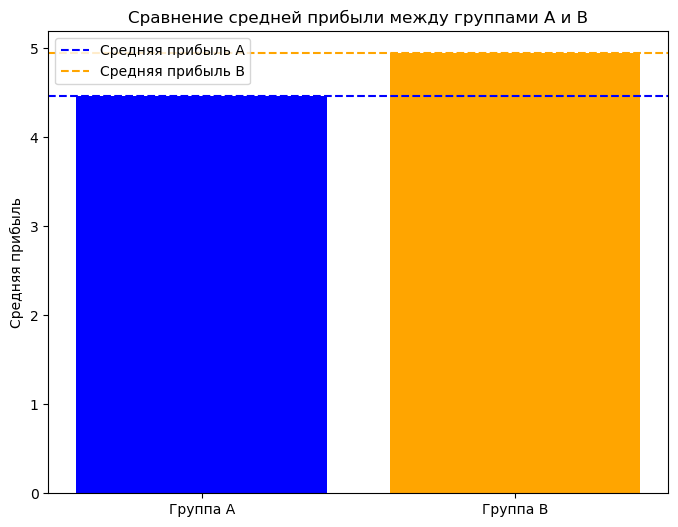

In [53]:
# Визуализация результатов
plt.figure(figsize=(8, 6))
plt.bar(['Группа A', 'Группа B'], [data_A.mean(), data_B.mean()], color=['blue', 'orange'])
plt.ylabel('Средняя прибыль')
plt.title('Сравнение средней прибыли между группами A и B')
plt.axhline(y=data_A.mean(), color='blue', linestyle='--', label='Средняя прибыль A')
plt.axhline(y=data_B.mean(), color='orange', linestyle='--', label='Средняя прибыль B')
plt.legend()
plt.show()

Метод CUPED показал, что переменная T имеет значительное положительное влияние на скорректированную прибыль (коэффициент 4.9383, p < 0.0001), что подтверждает статистическую значимость эффекта новой политики. Хотя R-squared (0.017) невелик, CUPED позволил уменьшить разброс данных и повысить точность оценки. Следующие шаги включают анализ устойчивости, проверку остатков на автокорреляцию и гетероскедастичность, а также рассмотрение других методов повышения точности модели.

### 7. Итоговые выводы

In [60]:
# Сводная таблица результатов
final_results = {
    'Тритмент': ['A', 'B'],
    'Средняя прибыль': [data_A.mean(), data_B.mean()],
    'T-statistic': [t_statistic, None],
    'P-value': [p_value, None]
}
results_df = pd.DataFrame(final_results)
results_df

,Тритмент,Средняя прибыль,T-statistic,P-value
0,A,4.460535,-2.427407,0.0
1,B,4.938850,NaN,NaN


По результатам анализа A/B-тестирования, в котором сравнивались две группы с различными наценками (группа A с наценкой 4% и группа B с наценкой 9%), мы получили следующие ключевые результаты:

Средняя прибыль:

    Группа A (4% наценка) показала среднюю прибыль в 4.46.
    Группа B (9% наценка) показала среднюю прибыль в 4.94.
Статистические тесты:

T-статистика составила -2.43, что указывает на наличие значимой разницы между группами.
P-значение равно 0.01521, что ниже уровня значимости 0.05. Это позволяет нам отвергнуть нулевую гипотезу о равенстве средних прибылей двух групп.
Таким образом, результаты подтверждают, что наценка в 9% (группа B) приводит к большей прибыли по сравнению с наценкой в 4% (группа A) и является статистически значимой. Эти выводы могут служить основой для дальнейших стратегий ценообразования в компании.

В ходе A/B-тестирования была оценена эффективность двух ценовых стратегий (наценки 4% и 9%) на прибыль от продажи билетов. Мы провели анализ данных, проверили балансировку ковариатов, выполнили первичную оценку эффекта с помощью t-теста и использовали множественную регрессию для оценки влияния различных факторов на общую прибыль. Результаты показали, что группа с наценкой 9% (группа B) имеет среднюю прибыль 4.94, что статистически значимо выше по сравнению с группой A (4.46), с t-статистикой -2.43 и p-значением 0.01521. Это подтверждает эффективность более высокой наценки. Для улучшения точности оценок было применено метод CUPED, который также показал значительное положительное влияние на скорректированную прибыль.